In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

С сайта Росстата были скачены данные по номинальной заработной плате в строительстве и htrkfvt за период 2002-2022 гг (https://rosstat.gov.ru/labor_market_employment_salaries). 
Данные по инфляции получены отсюда: https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8. Данные были обработаны ы excel и сохранены в формате csv для дальнейшего анализа. -->

Для сравнения возьмем две отрасли российской экономики, значительно отстававшие в 20 веке и получившие развитие в 21-ом: строительство ("Раздел F Строительство" в период 2002-2016 гг и "Строительство" в период 2017-2022 гг) и реклама ("Рекламная деятельность" и "Деятельность рекламная" соответственно)

In [4]:
data = pd.read_csv('C:\\Users\\user\\TRY_Jupyter\\real_sal.csv')
data.head()

,Unnamed: 0,Column1,Год,Строительство,Индекс_ном_зп_строительство,реал_изменение_строительство,Реал_строительство,Рекламная деятельность,Индекс_ном_зп_реклама,реал_изменение_реклама,Реал_реклама,Инфляция
0,0,0,2002,4806.9,100.000000,0.000000,4806.900000,6685.7,0.000000,0.000000,6685.700000,15.06
1,1,1,2003,6176.7,128.496536,14.739295,5515.403161,8429.7,126.085526,12.586415,7527.189928,11.99
2,2,2,2004,7304.7,118.262179,5.836924,5837.333050,11773.1,139.662147,24.988497,9408.121583,11.74
3,3,3,2005,9042.8,123.794269,11.616869,6515.448385,23119.1,196.372238,77.055485,16657.595300,10.91
4,4,4,2006,10869.2,120.197284,10.272738,7184.763304,30021.7,129.856699,19.134586,19844.957170,9.00


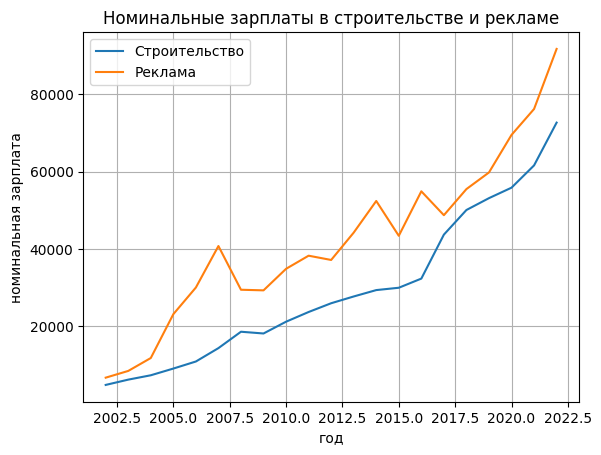

In [6]:
plt.plot(data['Год'], data[['Строительство', 'Рекламная деятельность']])
plt.title('Номинальные зарплаты в строительстве и рекламе')
plt.legend(['Строительство', 'Реклама'])
plt.xlabel('год')
plt.ylabel('номинальная зарплата')
plt.grid()
plt.show()

Средние зарплаты в строительстве и рекламной сфере растут на протяжении всего рассматриваемого периода. Вместе с тем, зарплаты в строительстве ниже, чем в рекламе. Это объясняется тем, что в строительстве большой процент неквалифицированных кадров (разнорабочие). В рекламе же задействованы, как правило, специалисты высокой квалификации, например, имеющие навыки анализа данных, обладающие знаниями в сфере эффективной коммуникации, информационных технологий и дизайна. 

Рост зарплат в сфере рекламы неравномерный, в период 2013-2016 гг - пилообразный. Это можно объяснить ростом геополитической напряженности, которая негативно сказывается на предпринимательской деятельности, от активности в которой сильно зависит доходность рекламного бизнеса. Обращает на себя внимание успешный для рекламщиков 2006-2007 годы (пик на графике). Превзойти этот результат до сих пор не удалось. Можно предположить, что связано это в целом с экономическими успехами докризисного 2006 года, оптимизмом бизнеса и его желанием вкладываться в развитие.

Разница в средних номинальных зарплатах в выбранных отраслях в период до 2015 года была значительно больше, чем в более поздний период. Возможной причиной может быть недостаточная прозрачность строительной отрасли, когда большой процент зарплат выплачивается без соответствующего учета с целью ухода от налогов. Финансовые нарушения приводили не только к уменьшению поступлений в бюджет, но и появлению большого числа "обманутых дольщиков", а это уже социальная проблема и серьезное препятствие для развития не только строительной отрасли, но и смежных, например, ипотечного кредитования. С другой стороны, строительная отрасль широко использует труд мигрантов. Усиление борьбы государства с незаконной миграцией (например, введение квот) также способствовало упорядочиванию деятельности в строительстве. Итак, ужесточение финансового и миграционного контроля со стороны государства позволило обелить строительный рынок, что вполне могло привести к более реалистичному отображению зарплат в статистике.

Начиная с 2016 года рост зарплат в обеих отраслях ускоряется. Можно предложить несколько объяснений: 1) изменилась методика расчета номинальных зарплат 2) государство предпринимает усилия по обелению бизнеса 3) усилиям государства по выведению бизнеса из тени способствуют новые технологии (развитие электронного банкинга) и изменения в законодательстве (появление новых форм долевого строительства, развитие льготных видов ипотеки, ужесточение контроля за уличной рекламой и пр)

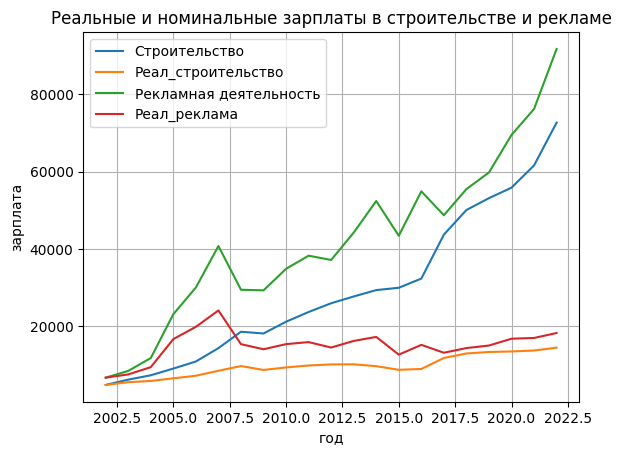

In [7]:
plt.plot(data['Год'], data[['Строительство', 'Реал_строительство', 'Рекламная деятельность', 'Реал_реклама']])
plt.title('Реальные и номинальные зарплаты в строительстве и рекламе')
plt.legend(['Строительство', 'Реал_строительство', 'Рекламная деятельность', 'Реал_реклама'])
plt.xlabel('год')
plt.ylabel('зарплата')
plt.grid()
plt.show()

На графике хорошо видно, что реальные зарплаты не демонстрируют такой же оглушительный рост, какой показали номинальные. 
Построим гистограмму

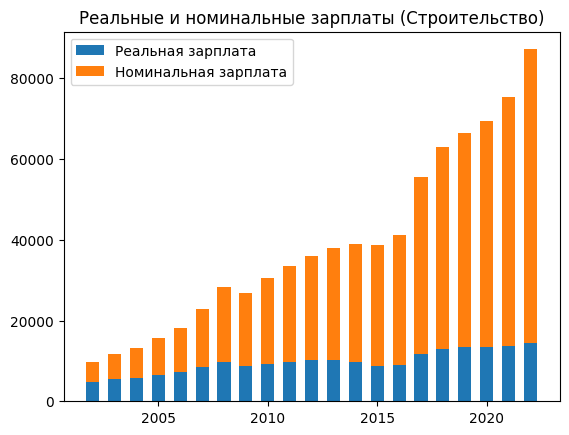

In [8]:
# смотримм, сколько "съела" инфляция от зарплат в каждой отрасли
years = data['Год']
infl = {
    'Реальная зарплата': data['Реал_строительство'],
    'Номинальная зарплата': data['Строительство'],
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(21)

for real, count in infl.items():
    p = ax.bar(years, count, width, label=real, bottom=bottom)
    bottom += count

    # ax.bar_label(p, label_type='center')

ax.set_title('Реальные и номинальные зарплаты (Строительство)')
ax.legend()

plt.show()

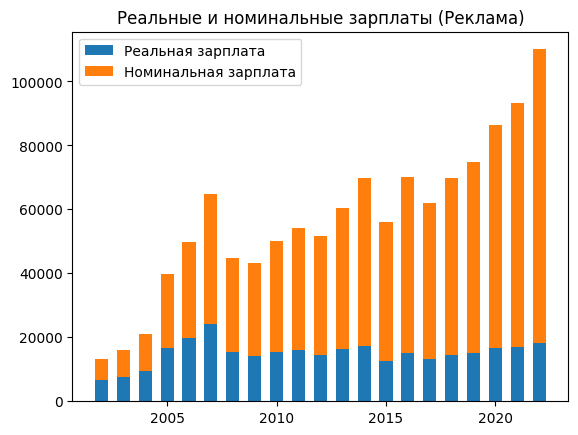

In [9]:
years = data['Год']
infl_1 = {
    'Реальная зарплата': data['Реал_реклама'],
    'Номинальная зарплата': data['Рекламная деятельность'],
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(21)

for real, count in infl_1.items():
    p = ax.bar(years, count, width, label=real, bottom=bottom)
    bottom += count

    # ax.bar_label(p, label_type='center')

ax.set_title('Реальные и номинальные зарплаты (Реклама)')
ax.legend()

plt.show()

Убедимся, что инфляция имеет тенденцию к снижению, хотя это реализуется скачкообразно, с расширением амплитуды и от очень высоких, даже для развивающейся экономики, значений. Заодно посмотрим на нормализованные значения реальных зарплат в выбранных отраслях.

In [10]:
# нормализуем данные

scaler = StandardScaler()
scaler.fit(data[['Реал_строительство', 'Реал_реклама', 'Инфляция']])
res = scaler.transform(data[['Реал_строительство', 'Реал_реклама', 'Инфляция']])

data[['Реал_строительство_норм', 'Реал_реклама_норм', 'Инфляция_норм']] = res
data.head()


,Unnamed: 0,Column1,Год,Строительство,Индекс_ном_зп_строительство,реал_изменение_строительство,Реал_строительство,Рекламная деятельность,Индекс_ном_зп_реклама,реал_изменение_реклама,Реал_реклама,Инфляция,Реал_строительство_норм,Реал_реклама_норм,Инфляция_норм
0,0,0,2002,4806.9,100.000000,0.000000,4806.900000,6685.7,0.000000,0.000000,6685.700000,15.06,-1.771688,-2.197980,1.749153
1,1,1,2003,6176.7,128.496536,14.739295,5515.403161,8429.7,126.085526,12.586415,7527.189928,11.99,-1.513751,-1.975586,0.894138
2,2,2,2004,7304.7,118.262179,5.836924,5837.333050,11773.1,139.662147,24.988497,9408.121583,11.74,-1.396549,-1.478481,0.824512
3,3,3,2005,9042.8,123.794269,11.616869,6515.448385,23119.1,196.372238,77.055485,16657.595300,10.91,-1.149674,0.437458,0.593351
4,4,4,2006,10869.2,120.197284,10.272738,7184.763304,30021.7,129.856699,19.134586,19844.957170,9.00,-0.906004,1.279835,0.061404


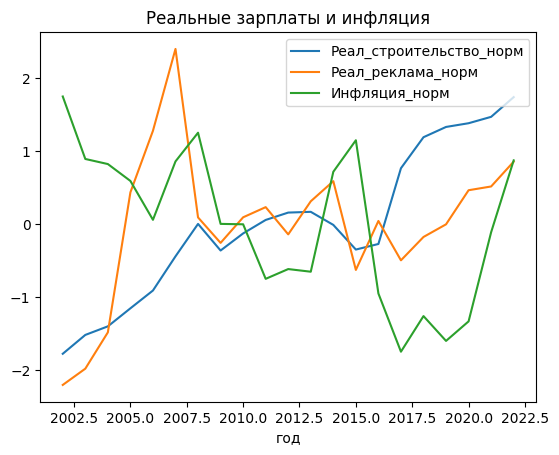

In [11]:
plt.plot(data['Год'], data[['Реал_строительство_норм', 'Реал_реклама_норм', 'Инфляция_норм']])
plt.title('Реальные зарплаты и инфляция')
plt.legend(['Реал_строительство_норм', 'Реал_реклама_норм', 'Инфляция_норм'])
plt.xlabel('год')
plt.show()

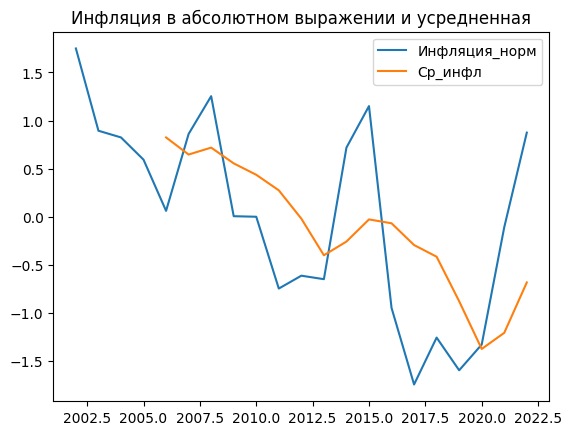

In [12]:
#  сгладим линию инфляции, взяв среднее значение за 5 ближайших лет

data['Ср_инфл'] = data['Инфляция_норм'].rolling(5).mean()
plt.plot(data['Год'], data[['Инфляция_норм', 'Ср_инфл']])
plt.title('Инфляция в абсолютном выражении и усредненная')
plt.legend(['Инфляция_норм', 'Ср_инфл'])

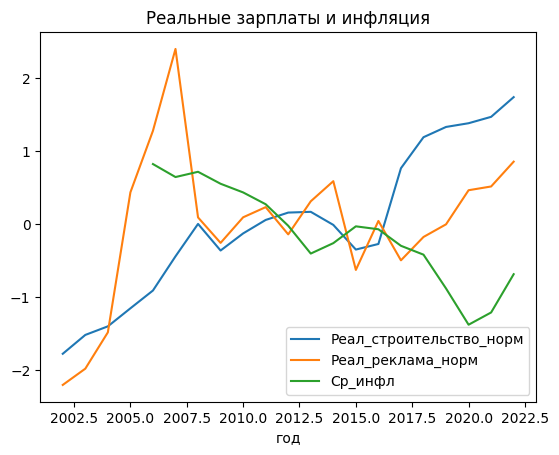

In [13]:
# теперь снова посмотрим на зарплаты и усредненную по 5 лет инфляцию
plt.plot(data['Год'], data[['Реал_строительство_норм', 'Реал_реклама_норм', 'Ср_инфл']])
plt.title('Реальные зарплаты и инфляция')
plt.legend(['Реал_строительство_норм', 'Реал_реклама_норм', 'Ср_инфл'])
plt.xlabel('год')
plt.show()

Инфляция имеет тенденцию к снижению, тогда как реальные зарплаты немного растут. 

In [15]:
data.to_csv('C:\\Users\\user\\TRY_Jupyter\\real_sal_2.csv')